In [27]:
import os
ROOT = os.path.dirname(os.path.dirname(os.getcwd()))
print(ROOT)

/home/saisampathkedari/MonteCarlo-Statistical-Methods


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [29]:
from utils.montecarlo import *
from mcmc.algorithms.metropolis_hastings import *
from mcmc.utils.mcmc_utils import *
from mcmc.diagnostics.autocorrelation import *
from mcmc.utils.run_helpers import *
from mcmc.diagnostics.iac_and_ess import *
from mcmc.algorithms.delayed_rejection import *
from mcmc.distributions.banana import *
from mcmc.algorithms.dram import *

# Delayed Rejection Adaptive Metropolis for Banana Distribution

In [30]:
target_pdf_banana = pdf_banana_eval
target_logpdf_banana = logpdf_banana_eval

In [31]:
laplace_mean = np.array([0,-1])
laplace_cov = build_2D_covariance_matrix(1.0,1.0,0.9)

In [32]:
# initial conditions
initial_sample = laplace_mean
initial_cov = laplace_cov # from Laplace Approximation
num_samples = 100000

# Proposal Distribution properties
proposal_logpdf = proposal_mvn_logpdf_eval
proposal_sampler = proposal_mvn_sampler


## Delayed Rejection
dram_result = dram_mcmc(initial_sample, initial_cov, num_samples, target_logpdf_banana, proposal_logpdf, proposal_sampler, freq_of_update=200, verbose=True)

samples = dram_result.samples
print("Accepted Samples Ratio:", dram_result.accept_rate)

Finished sample 1000, acceptance ratio = 0.444
Finished sample 2000, acceptance ratio = 0.397
Finished sample 3000, acceptance ratio = 0.374
Finished sample 4000, acceptance ratio = 0.355
Finished sample 5000, acceptance ratio = 0.342
Finished sample 6000, acceptance ratio = 0.330
Finished sample 7000, acceptance ratio = 0.323
Finished sample 8000, acceptance ratio = 0.313
Finished sample 9000, acceptance ratio = 0.307
Finished sample 10000, acceptance ratio = 0.302
Finished sample 11000, acceptance ratio = 0.297
Finished sample 12000, acceptance ratio = 0.296
Finished sample 13000, acceptance ratio = 0.295
Finished sample 14000, acceptance ratio = 0.292
Finished sample 15000, acceptance ratio = 0.288
Finished sample 16000, acceptance ratio = 0.284
Finished sample 17000, acceptance ratio = 0.280
Finished sample 18000, acceptance ratio = 0.277
Finished sample 19000, acceptance ratio = 0.274
Finished sample 20000, acceptance ratio = 0.271
Finished sample 21000, acceptance ratio = 0.270
F

## Burn-In

In [33]:
new_am_result= mcmc_burnin_and_thin(dram_result, burnin_frac=0.5, thin_frac=1)
samples = new_am_result.samples
print("Accepted Samples Ratio:", new_am_result.accept_rate)

Accepted Samples Ratio: 0.24248


In [34]:
ture_mean = np.array([0,-1])

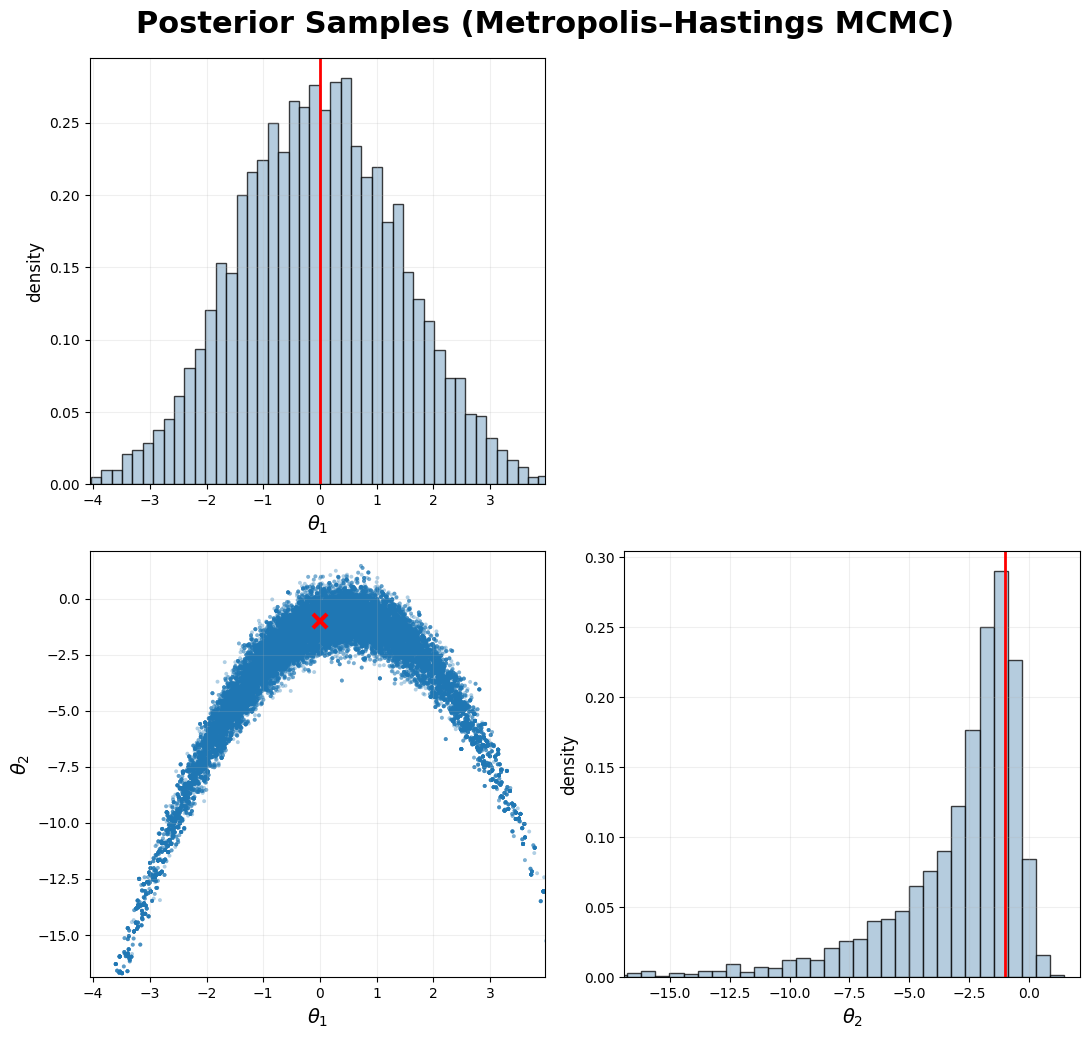

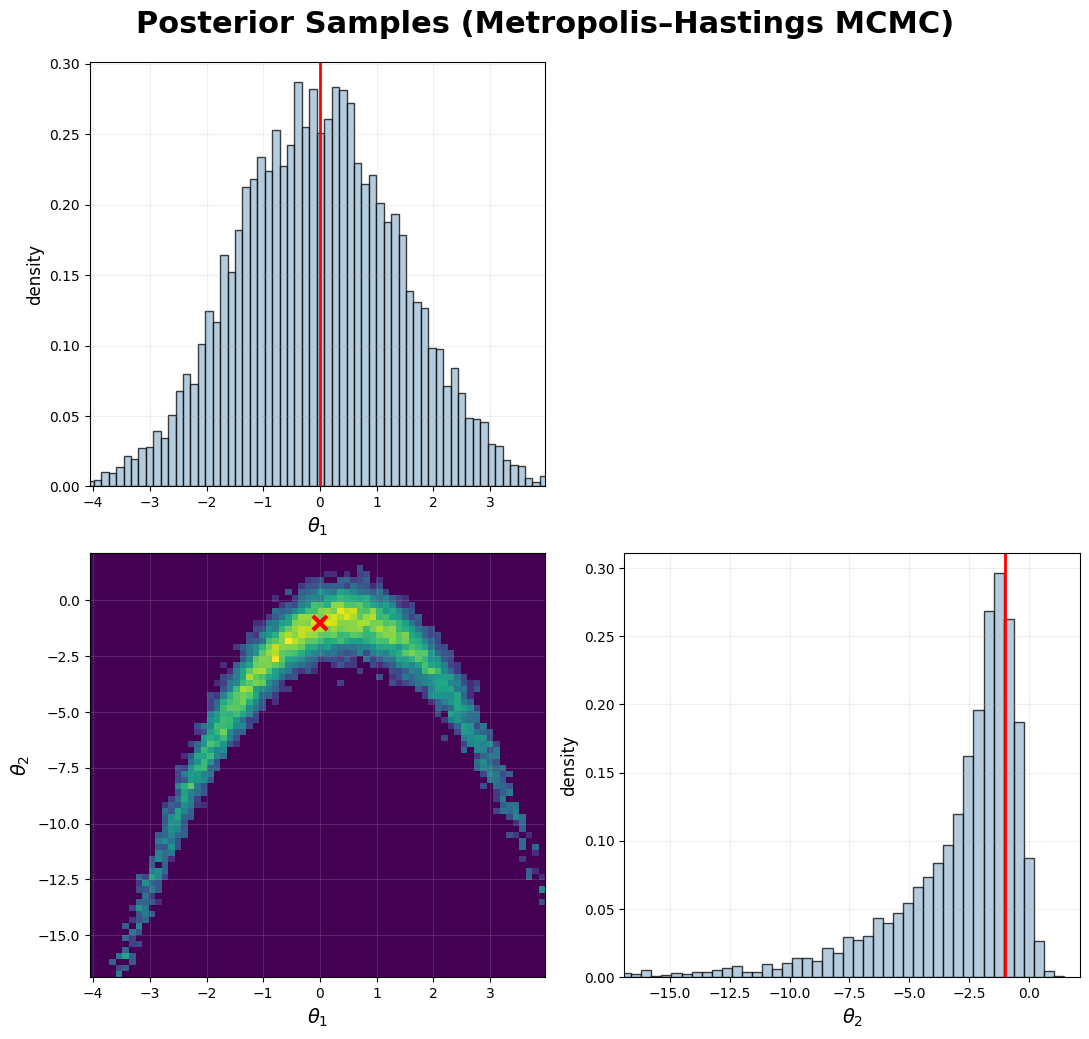

In [35]:
plt.close()
fig, axs, gs = scatter_matrix_clean(
    11,
    [samples],
    truths=ture_mean,          # or None
    labels=[r"$\theta_1$", r"$\theta_2$"],
    hist_plot=False,
)
save_path_2 = os.path.join(ROOT, "images/mcmc/DRAM_samples1_banana.png")
plt.savefig(save_path_2)
plt.show()

plt.close(12)
fig, axs, gs = scatter_matrix_clean(
    12,
    [samples],
    truths=ture_mean,
    labels=[r"$\theta_1$", r"$\theta_2$"],
    hist_plot=True,
    nbins=70
)
save_path_3 = os.path.join(ROOT, "images/mcmc/DRAM_samples2_banana.png")
plt.savefig(save_path_3)
plt.show()

## Estimation of Mean

In [36]:
print("True Mean        = ", np.array([0,-2]))
print("Estimated Mean   = ", np.mean(samples, axis=0))

True Mean        =  [ 0 -2]
Estimated Mean   =  [-0.02152477 -3.03319317]


## Mixing

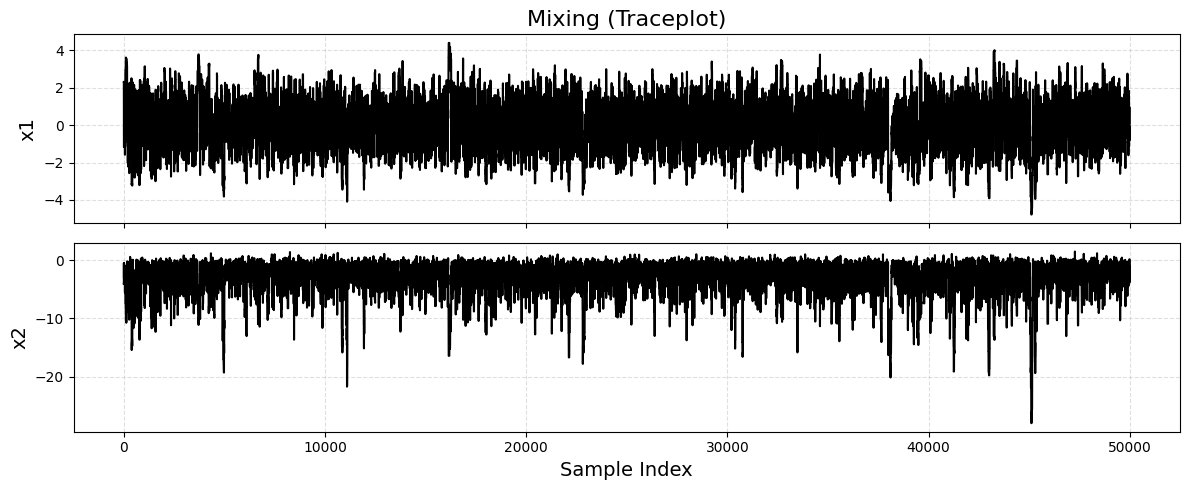

In [37]:
save_path_3 = os.path.join(ROOT, "images/mcmc/Mixing_DRAM_banana.png")
plot_mixing_2d(samples, dim_names=("x1", "x2"), save_path=save_path_3)

## Autocorrelation

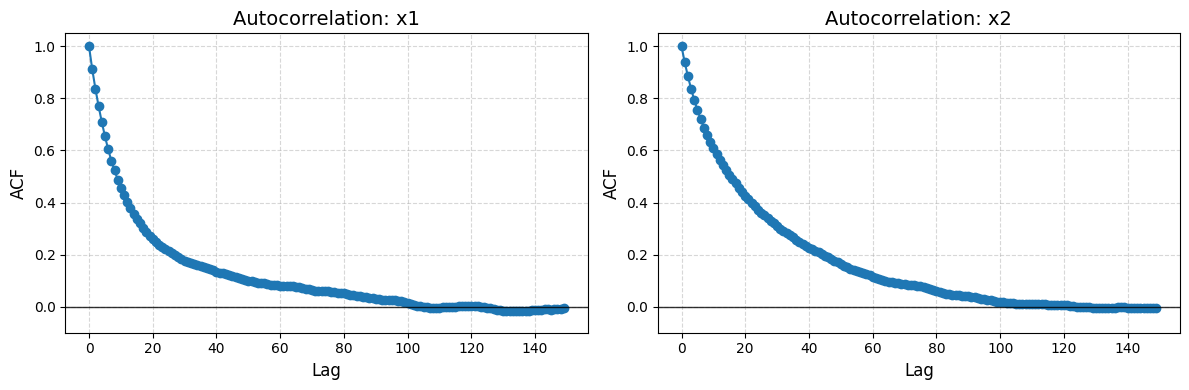

In [40]:
lags, acf = autocorrelation_vectorized(samples, max_lag=150)

save_path_4 = os.path.join(ROOT, "images/mcmc/AutoCorr_DRAM_banana.png")
plot_autocorrelation_2d(lags, acf, dim_names=("x1", "x2"), save_path=save_path_4)

## Integrated Auto-Correlation & Effective Sample Size

In [41]:
iac, acf, lags = integrated_autocorrelation(samples, max_lag=300)
ess = effective_sample_size(samples, iac)

N = samples.shape[0]
efficiency = ess / N * 100  # percentage

print(f"Total samples: {N}\n")

for k in range(len(iac)):
    print(f"Dimension {k}:")
    print(f"  IAC:          {iac[k]:.4f}")
    print(f"  ESS:          {ess[k]:.2f}")
    print(f"  Efficiency:   {efficiency[k]:.1f}%   "
          f"({efficiency[k]:.1f}% as effective as independent samples)")
    print()

Total samples: 50000

Dimension 0:
  IAC:          36.0131
  ESS:          1388.38
  Efficiency:   2.8%   (2.8% as effective as independent samples)

Dimension 1:
  IAC:          50.3687
  ESS:          992.68
  Efficiency:   2.0%   (2.0% as effective as independent samples)

